In [59]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

## Plot distribution

In [60]:
def norm(positions):
    l1norm = [abs(p) for pos in positions for p in pos]
    l2norm = [sum(p**2 for p in pos)**(0.5) for pos in positions]
    return l1norm, l2norm

def calc_expectation(steps):
    return sum(steps) / len(steps)

## One-dimension

Round: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [13:31<00:00,  1.23it/s]


The particle comes back to the origin for 1152123 times
The particle stays at section 1 for 563670600 time steps.
The particle stays at section 2 for 546277277 time steps.
Finished Random Walking: 811.3957717418671 secs
The distribution of 100 steps


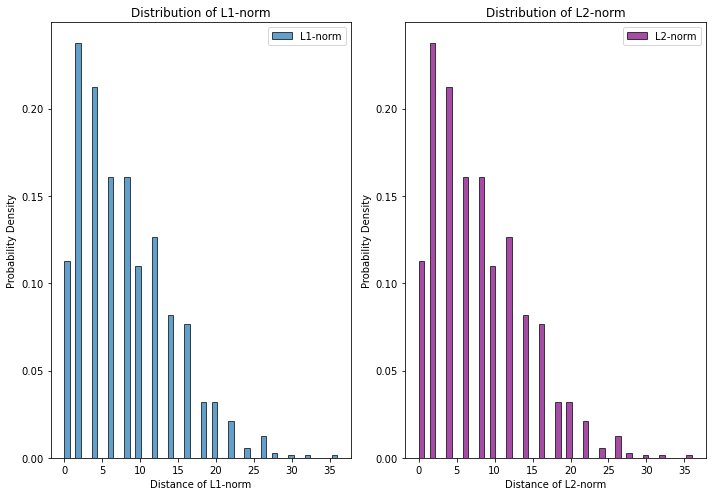

------------------

The distribution of 1000 steps


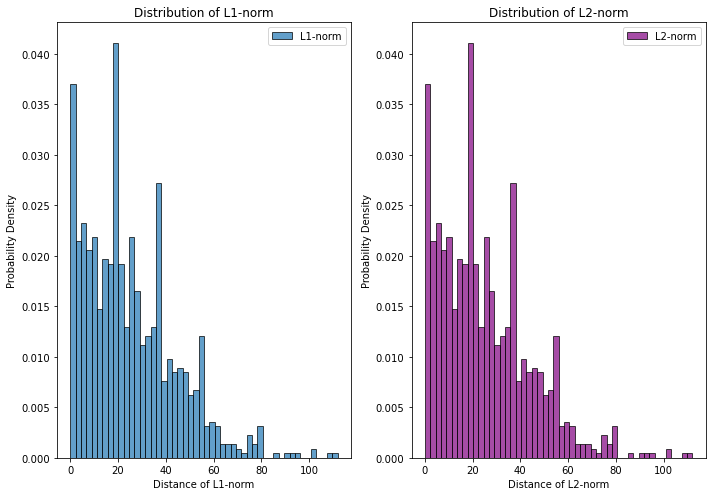

------------------

The distribution of 10000 steps


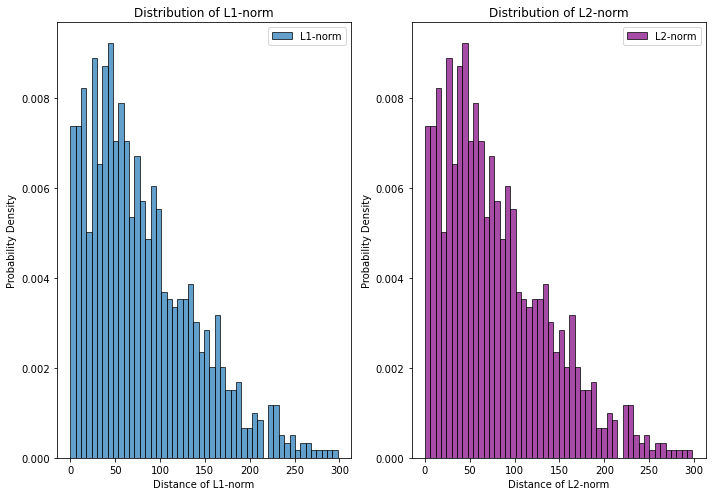

------------------

The distribution of 100000 steps


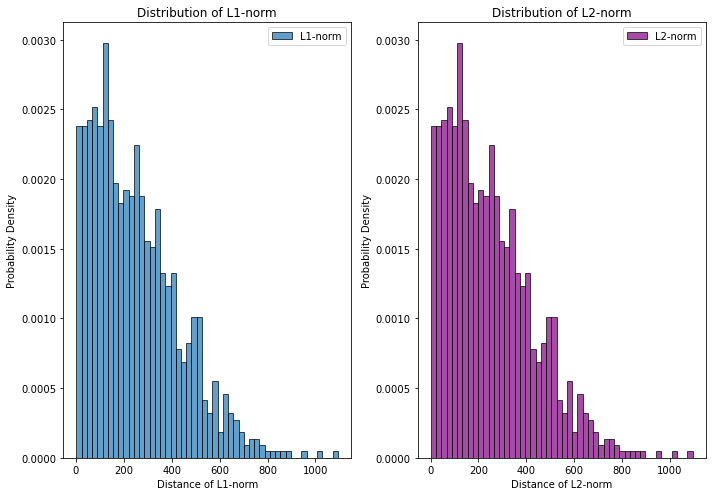

------------------

The distribution of 1000000 steps


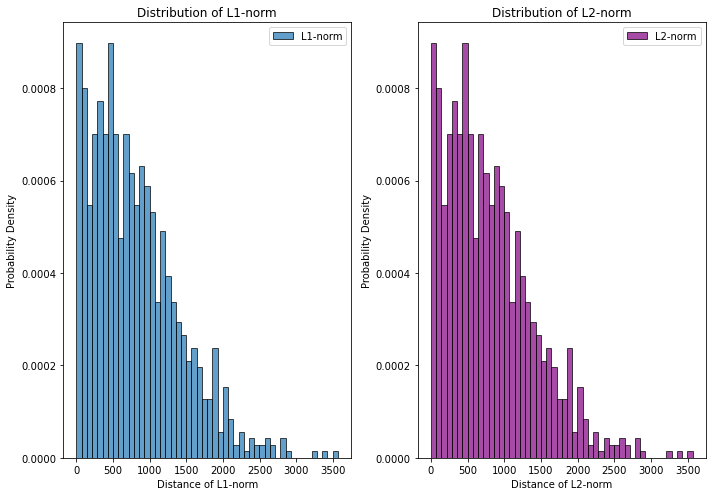

------------------



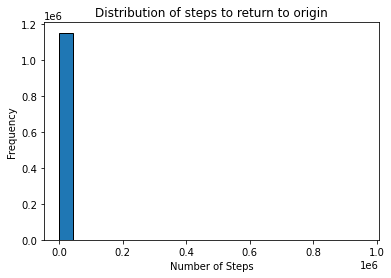

The expectation of time steps required to the origin: 486.785071 


#---distribution of m ≝ ½n₀ + max(n₋,n₊)---#

distribution of m in 100 steps


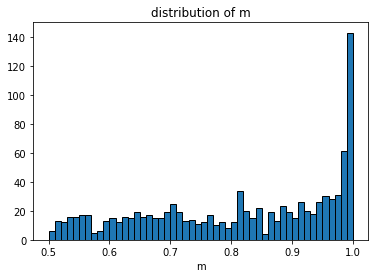

--------------------
distribution of m in 1000 steps


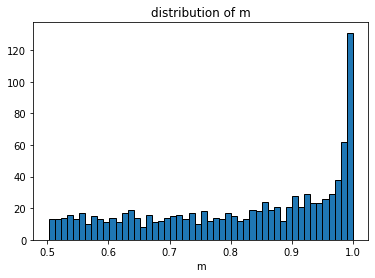

--------------------
distribution of m in 10000 steps


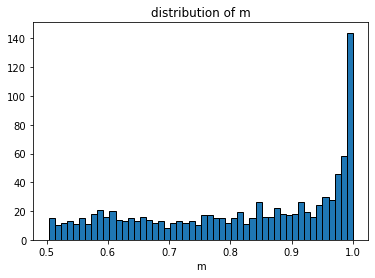

--------------------
distribution of m in 100000 steps


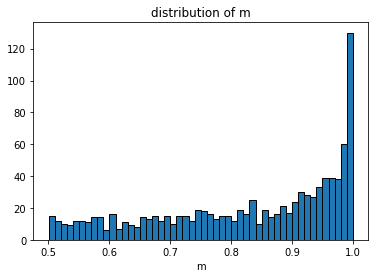

--------------------
distribution of m in 1000000 steps


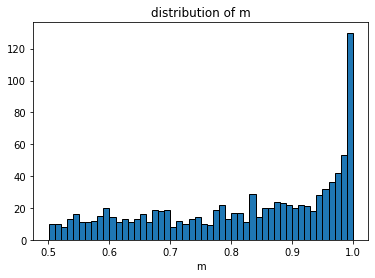

--------------------


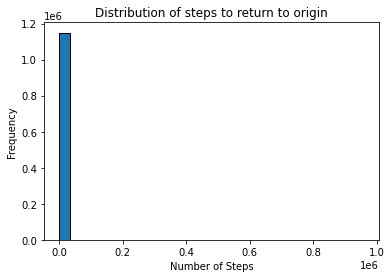

The expectation of time steps required to the origin: 486.785071 

# --- Some analysis --- #
mean: 486.78507069123697
median: 2.0
lower_bound: -10.0
upper_bound: 22.0


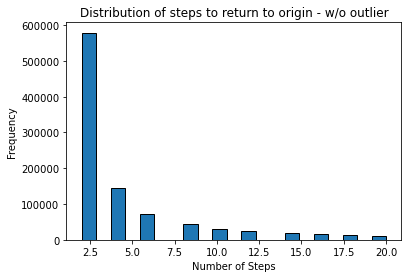

The expectation of time steps required to the origin: 4.272664


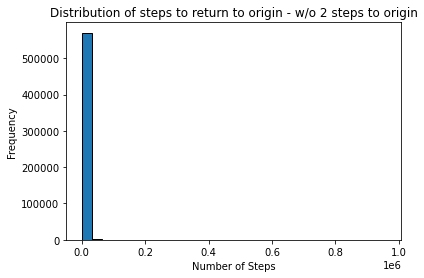

The expectation of time steps required to the origin: 976.235317


In [70]:
import random

# one-dimension
def random_walk1():
    steps = [int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]
    # steps in single round
    section = {key:[] for key in steps}
    # total steps
    sections = [0, 0, 0]
    to_origin = []
    final_pos = {key:[] for key in steps}
    start_time = time.time()

    for rounds in tqdm(range(1000), desc="Round"):
        # initialize position
        for step in steps:
            sec = [0, 0, 0]
            pos = 0
            steps_taken = 0
            for s in range(step):
                # random walk
                pos += random.choice([1, -1])
                steps_taken += 1

                # determine section
                if pos > 0:
                    sec[1] += 1
                elif pos < 0:
                    sec[2] += 1
                else:
                    # record origin
                    to_origin.append(steps_taken)
                    steps_taken = 0    # reset time_taken
                    sec[0] += 1
            
            # record time steps in each round
            section[step].append(sec)
            # summarize steps in rounds
            sections = np.sum([sections, sec], axis=0).tolist()
            final_pos[step].append([pos])
    
    
    # record origin
    print("The particle comes back to the origin for %d times" % sections[0])

    for s in sections[1:]:
        print("The particle stays at section %d for %d time steps." %(sections.index(s), s))
    print("Finished Random Walking: %s secs" %(time.time()-start_time))

    # plot the distribution of L1 and L2-norm
    for step in steps:
        l1, l2 = norm(final_pos[step])
        print("The distribution of %d steps" %step)

        plt.figure(figsize=(10, 7))
        # L1-norm
        plt.subplot(1,2,1)
        plt.hist(l1, bins=50, label=f'L1-norm', density=True, edgecolor='black', alpha=0.7)
        plt.title('Distribution of L1-norm')
        plt.xlabel('Distance of L1-norm')
        plt.ylabel('Probability Density')
        plt.legend()

        # L2-norm
        plt.subplot(1,2,2)
        plt.hist(l2, bins=50, label=f'L2-norm', density=True, edgecolor='black', alpha=0.7, color="purple")
        plt.title('Distribution of L2-norm')
        plt.xlabel('Distance of L2-norm')
        plt.ylabel('Probability Density')
        plt.tight_layout()
        plt.legend()
        plt.show()
        
        print("------------------\n")
    
    # plot the distribution of steps to the origin
    plt.hist(to_origin, bins='sturges', edgecolor='black')
    plt.title('Distribution of steps to return to origin')
    plt.xlabel('Number of Steps')
    plt.ylabel('Frequency')
    plt.show()
    
    expect = calc_expectation(to_origin)
    print("The expectation of time steps required to the origin: %f \n" %expect)
    
    
    print("\n#---distribution of m ≝ ½n₀ + max(n₋,n₊)---#\n")
    for step in steps:
        print("distribution of m in %d steps" %step)
        
        # m ≝ ½n₀ + max(n₋,n₊)
        m = [(1/2*s[0] + max(s[1], s[2]))/step for s in section[step]]
        plt.hist(m, bins=50, label="m", edgecolor="black")
        plt.title("distribution of m")
        plt.xlabel("m")
        plt.show()
        print("--------------------")
        
    
    # plot the distribution of steps to the origin
    plt.hist(to_origin, bins=30, edgecolor='black')
    plt.title('Distribution of steps to return to origin')
    plt.xlabel('Number of Steps')
    plt.ylabel('Frequency')
    plt.show()
    
    expect = calc_expectation(to_origin)
    print("The expectation of time steps required to the origin: %f \n" %expect)
    
    
    # --- Some analysis --- #
    
    print("# --- Some analysis --- #")
    
    # calc mean and median
    mean = np.mean(to_origin)
    median = np.median(to_origin)
    print("mean:", mean)
    print("median:", median)
    
    # calc Quantile
    q1 = np.percentile(to_origin, 25)
    q3 = np.percentile(to_origin, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    print("lower_bound:", lower_bound)
    print("upper_bound:", upper_bound)
    
    to_origin2 = [s for s in to_origin if s > lower_bound and s < upper_bound]
    plt.hist(to_origin2, bins='sturges', edgecolor='black')
    plt.title('Distribution of steps to return to origin - w/o outlier')
    plt.xlabel('Number of Steps')
    plt.ylabel('Frequency')
    plt.show()
    print("The expectation of time steps required to the origin: %f" %calc_expectation(to_origin2))
    
    to_origin3 = [s for s in to_origin if s != 2]
    plt.hist(to_origin3, bins=30, edgecolor='black')
    plt.title('Distribution of steps to return to origin - w/o 2 steps to origin')
    plt.xlabel('Number of Steps')
    plt.ylabel('Frequency')
    plt.show()
    print("The expectation of time steps required to the origin: %f" %calc_expectation(to_origin3))
    
    
    
    
random_walk1()

## two-dimension

Round: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [18:47<00:00,  1.13s/it]


The particle comes back to the origin for 14181 times
The particle stays at section 1 for 290673626 time steps.
The particle stays at section 2 for 279823949 time steps.
The particle stays at section 3 for 262423063 time steps.
The particle stays at section 4 for 274885306 time steps.
Finished Random Walking: 1127.7245144844055 secs


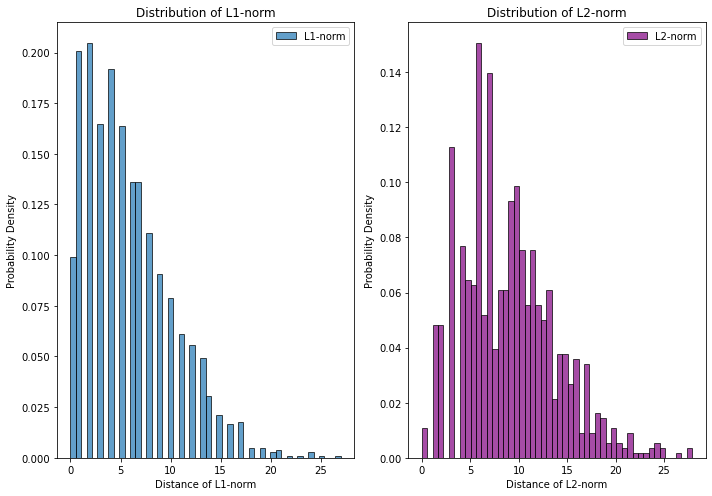

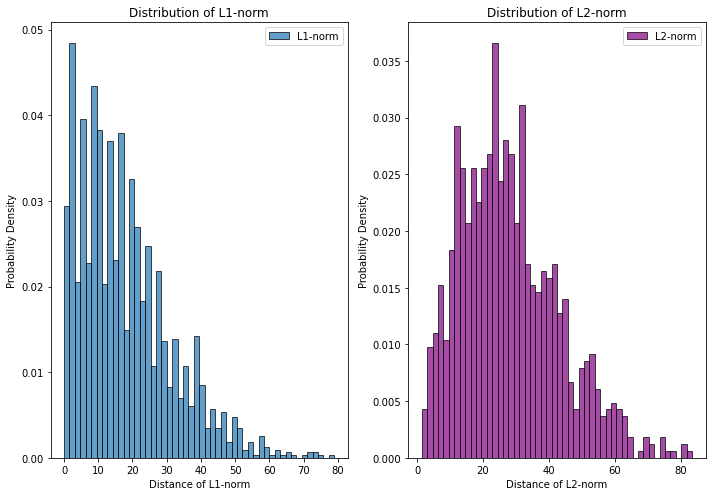

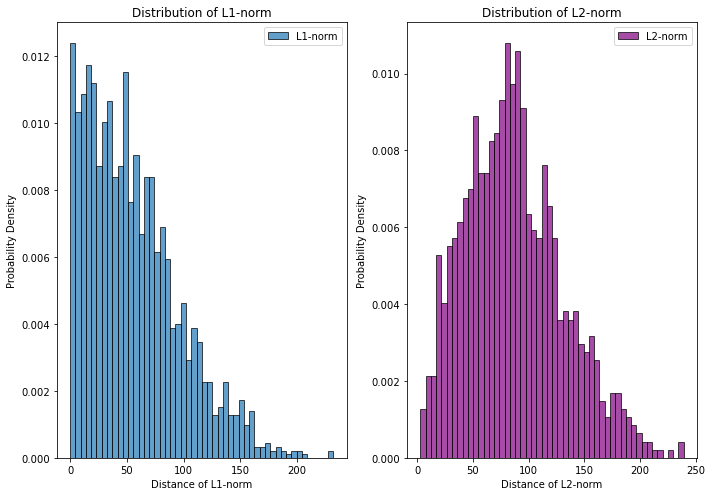

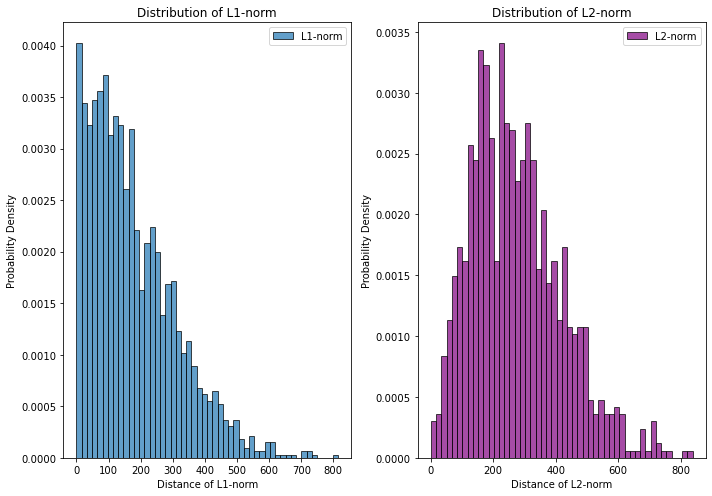

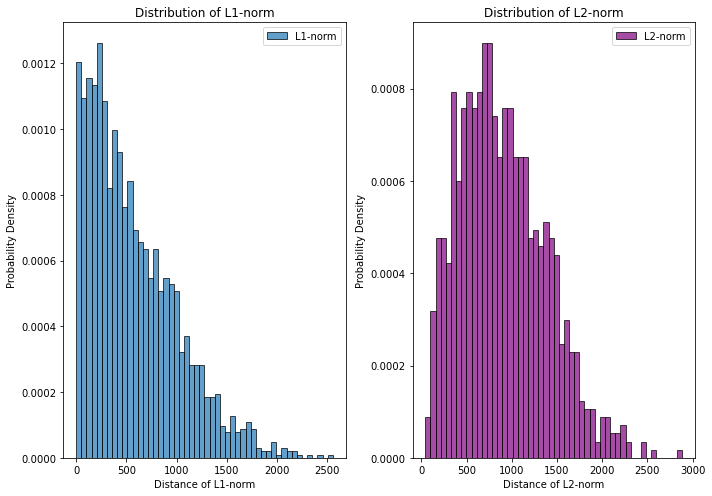

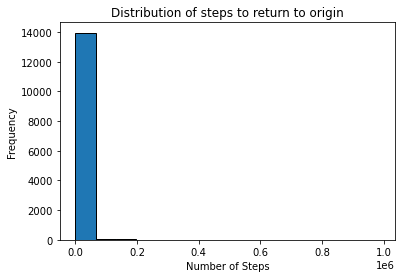

The expectation of time steps required to the origin: 5146.101685 

mean: 5146.101685353642
median: 6.0
lower_bound: -82.0
upper_bound: 142.0


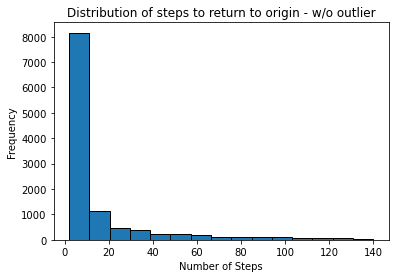

The expectation of time steps required to the origin: 15.160691


In [3]:
def random_walk2():
    steps = [int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]
    sections = [0 for _ in range(5)]
    to_origin = []
    start_time = time.time()
    final_pos = {key:[] for key in steps}

    for round in tqdm(range(1000), desc="Round"):
        for step in steps:
            # initalize position
            pos = [0, 0]
            steps_taken = 0
            for s in range(step):
                di = random.choice([(1,0), (-1,0), (0,1), (0,-1)])
                pos[0] += di[0]
                pos[1] += di[1]
                steps_taken += 1

                # specify sections
                if pos[0] > 0:
                    if pos[1] > 0:
                        sections[1] += 1  # section 1
                    elif pos[1] < 0:
                        sections[2] += 1  # section 2
                elif pos[0] < 0:
                    if pos[1] < 0:
                        sections[3] += 1  # section 3
                    elif pos[1] > 0:
                        sections[4] += 1  # section 4
                elif pos == [0,0]:
                    sections[0] += 1
                    to_origin.append(steps_taken)
                    steps_taken = 0

            final_pos[step].append(pos)

    # record origin
    print("The particle comes back to the origin for %d times" % sections[0])

    for s in sections[1:]:
        print("The particle stays at section %d for %d time steps." %(sections.index(s), s))
    print("Finished Random Walking: %s secs" % (time.time()-start_time))

    for step in steps:
        l1, l2 = norm(final_pos[step])

        plt.figure(figsize=(10, 7))
        # L1-norm
        plt.subplot(1,2,1)
        plt.hist(l1, bins=50, label=f'L1-norm', density=True, edgecolor='black', alpha=0.7)
        plt.title('Distribution of L1-norm')
        plt.xlabel('Distance of L1-norm')
        plt.ylabel('Probability Density')
        plt.legend()

        # L2-norm
        plt.subplot(1,2,2)
        plt.hist(l2, bins=50, label=f'L2-norm', density=True, edgecolor='black', alpha=0.7, color="purple")
        plt.title('Distribution of L2-norm')
        plt.xlabel('Distance of L2-norm')
        plt.ylabel('Probability Density')
        plt.tight_layout()
        plt.legend()
        plt.show()
    
    # plot the distribution of steps to the origin
    plt.hist(to_origin, bins='sturges', edgecolor='black')
    plt.title('Distribution of steps to return to origin')
    plt.xlabel('Number of Steps')
    plt.ylabel('Frequency')
    plt.show()
    
    expect = calc_expectation(to_origin)
    print("The expectation of time steps required to the origin: %f \n" %expect)

    
    # --- Some analysis --- #
    
    # calc mean and median
    mean = np.mean(to_origin)
    median = np.median(to_origin)
    print("mean:", mean)
    print("median:", median)
    
    # calc Quantile
    q1 = np.percentile(to_origin, 25)
    q3 = np.percentile(to_origin, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    print("lower_bound:", lower_bound)
    print("upper_bound:", upper_bound)
    
    to_origin2 = [s for s in to_origin if s > lower_bound and s < upper_bound]
    plt.hist(to_origin2, bins='sturges', edgecolor='black')
    plt.title('Distribution of steps to return to origin - w/o outlier')
    plt.xlabel('Number of Steps')
    plt.ylabel('Frequency')
    plt.show()
    print("The expectation of time steps required to the origin: %f" %calc_expectation(to_origin2))
    

random_walk2()

## Three-dimension

Round: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [27:35<00:00,  1.66s/it]


The particle comes back to the origin for 2478 times
The particle stays at section 1 for 126080914 time steps.
The particle stays at section 2 for 139898862 time steps.
The particle stays at section 3 for 138005071 time steps.
The particle stays at section 4 for 149253768 time steps.
The particle stays at section 5 for 131577785 time steps.
The particle stays at section 6 for 143214108 time steps.
The particle stays at section 7 for 136444821 time steps.
The particle stays at section 8 for 140687832 time steps.


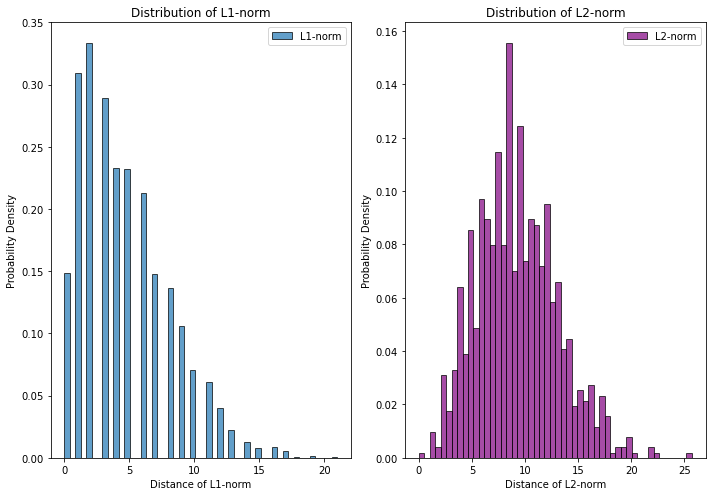

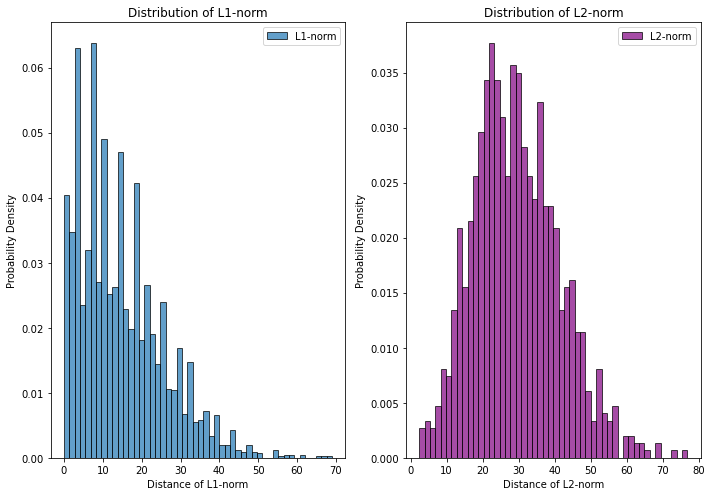

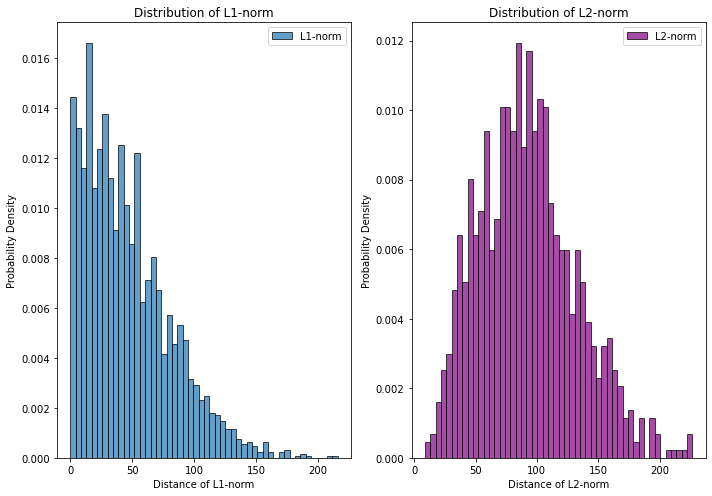

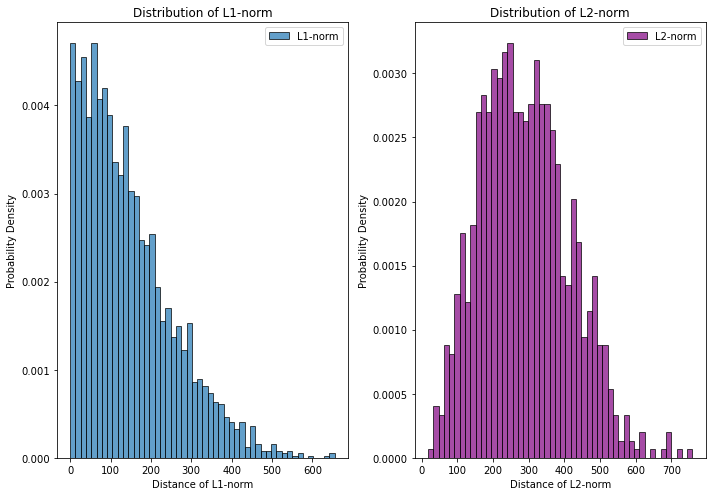

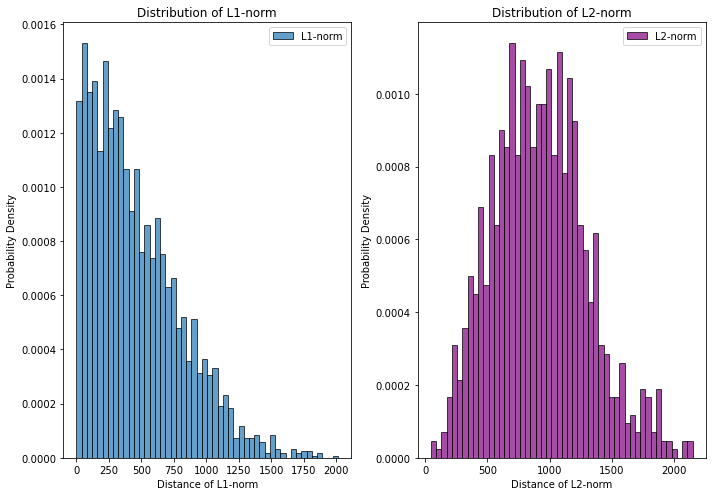

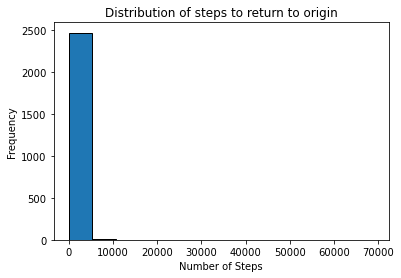

The expectation of time steps required to the origin: 109.204197 

mean: 109.2041969330105
median: 2.0
lower_bound: -10.0
upper_bound: 22.0


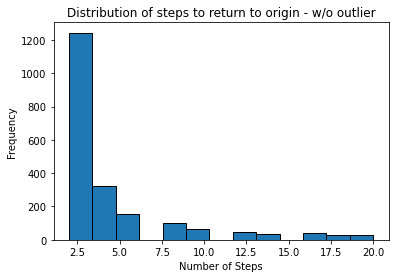

The expectation of time steps required to the origin: 4.309408


In [15]:
def random_walk3():
    steps = [int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]
    sections = [0 for _ in range(9)]
    start_time = time.time()
    to_origin = []
    final_pos = {key:[] for key in steps}

    for round in tqdm(range(1000), desc="Round"):
        for step in steps:
            pos = [0, 0, 0]
            steps_taken = 0
            for s in range(step):
                direction = random.choice([(1,0,0), (-1,0,0), (0,1,0), (0,-1,0), (0,0,1), (0,0,-1)])
                pos = [pos[i] + direction[i] for i in range(3)]
                steps_taken += 1

                # specify sections
                if pos[0] > 0:
                    if pos[1] > 0:
                        if pos[2] > 0:
                            sections[1] += 1  # section 1 e.g. (1,1,1)
                        elif pos[2] < 0:
                            sections[2] += 1  # section 2 e.g. (1,1,-1)
                    elif pos[1] < 0:
                        if pos[2] > 0:
                            sections[3] += 1  # section 3 e.g. (1,-1,1)
                        elif pos[2] < 0:
                            sections[4] += 1  # section 4 e.g. (1,-1,-1)
                elif pos[0] < 0:
                    if pos[1] > 0:
                        if pos[2] > 0:
                            sections[5] += 1  # section 5 e.g.(-1,1,1)
                        elif pos[2] < 0:
                            sections[6] += 1  # section 6 e.g.(-1,1,-1)
                    elif pos[1] < 0:
                        if pos[2] > 0:
                            sections[7] += 1  # section 7 e.g.(-1,-1,1)
                        elif pos[2] < 0:
                            sections[8] += 1  # section 1 e.g.(-1,-1,-1)
                elif pos == [0,0,0]:
                    sections[0] += 1
                    to_origin.append(steps_taken)
                    steps_taken = 0
            final_pos[step].append(pos)

        # record origin
    print("The particle comes back to the origin for %d times" % sections[0])

    for s in sections[1:]:
        print("The particle stays at section %d for %d time steps." %(sections.index(s), s))

    for step in steps:
        l1, l2 = norm(final_pos[step])

        plt.figure(figsize=(10, 7))
        # L1-norm
        plt.subplot(1,2,1)
        plt.hist(l1, bins=50, label=f'L1-norm', density=True, edgecolor='black', alpha=0.7)
        plt.title('Distribution of L1-norm')
        plt.xlabel('Distance of L1-norm')
        plt.ylabel('Probability Density')
        plt.legend()

        # L2-norm
        plt.subplot(1,2,2)
        plt.hist(l2, bins=50, label=f'L2-norm', density=True, edgecolor='black', alpha=0.7, color="purple")
        plt.title('Distribution of L2-norm')
        plt.xlabel('Distance of L2-norm')
        plt.ylabel('Probability Density')
        plt.tight_layout()
        plt.legend()
        plt.show()

    # plot the distribution of steps to the origin
    plt.hist(to_origin, bins='sturges', edgecolor='black')
    plt.title('Distribution of steps to return to origin')
    plt.xlabel('Number of Steps')
    plt.ylabel('Frequency')
    plt.show()

    expect = calc_expectation(to_origin)
    print("The expectation of time steps required to the origin: %f \n" %expect)


    # --- Some analysis --- #

    # calc mean and median
    mean = np.mean(to_origin)
    median = np.median(to_origin)
    print("mean:", mean)
    print("median:", median)

    # calc Quantile
    q1 = np.percentile(to_origin, 25)
    q3 = np.percentile(to_origin, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    print("lower_bound:", lower_bound)
    print("upper_bound:", upper_bound)

    to_origin2 = [s for s in to_origin if s > lower_bound and s < upper_bound]
    plt.hist(to_origin2, bins='sturges', edgecolor='black')
    plt.title('Distribution of steps to return to origin - w/o outlier')
    plt.xlabel('Number of Steps')
    plt.ylabel('Frequency')
    plt.show()
    print("The expectation of time steps required to the origin: %f" %calc_expectation(to_origin2))


random_walk3()

## Four-dimension

Round: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [39:01<00:00,  2.34s/it]


The particle comes back to the origin for 1147 times
The particle stays at section 1 for 66489349 time steps.
The particle stays at section 2 for 72253941 time steps.
The particle stays at section 3 for 68813532 time steps.
The particle stays at section 4 for 66609047 time steps.
The particle stays at section 5 for 73127365 time steps.
The particle stays at section 6 for 67302295 time steps.
The particle stays at section 7 for 74453201 time steps.
The particle stays at section 8 for 65376951 time steps.
The particle stays at section 9 for 65297574 time steps.
The particle stays at section 10 for 71954497 time steps.
The particle stays at section 11 for 64293103 time steps.
The particle stays at section 12 for 68000278 time steps.
The particle stays at section 13 for 64329085 time steps.
The particle stays at section 14 for 71158125 time steps.
The particle stays at section 15 for 74971376 time steps.
The particle stays at section 16 for 67418764 time steps.


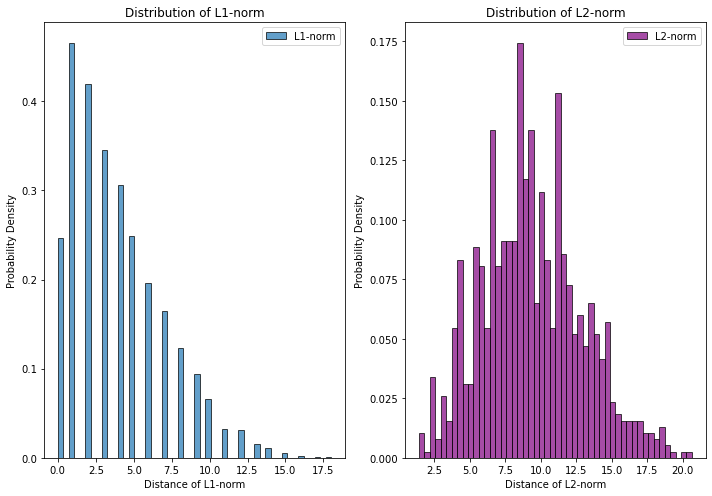

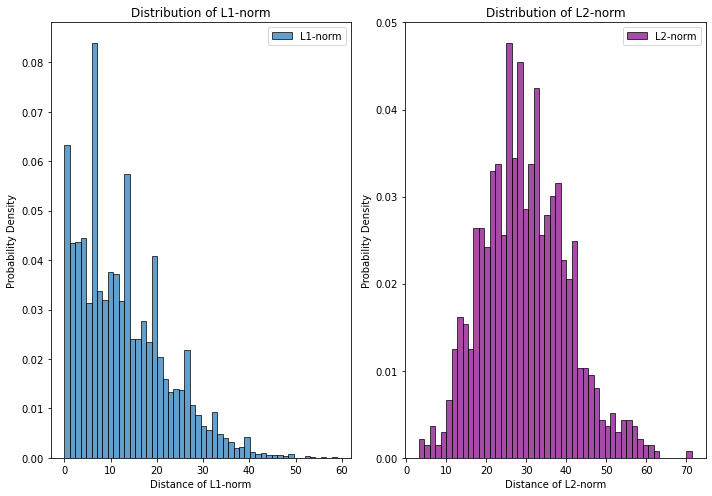

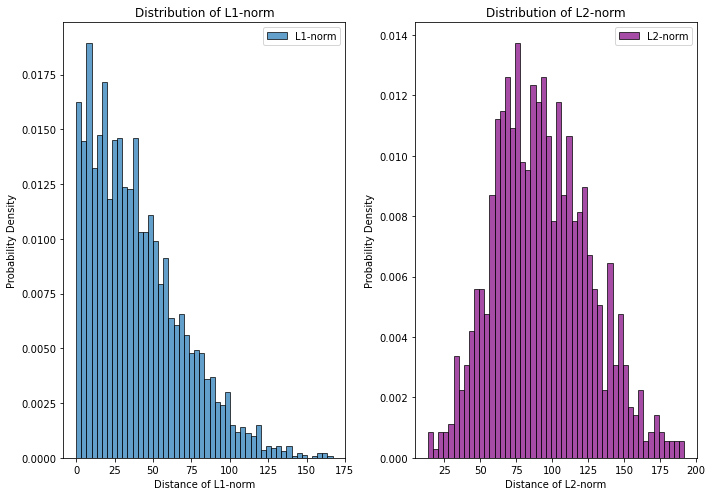

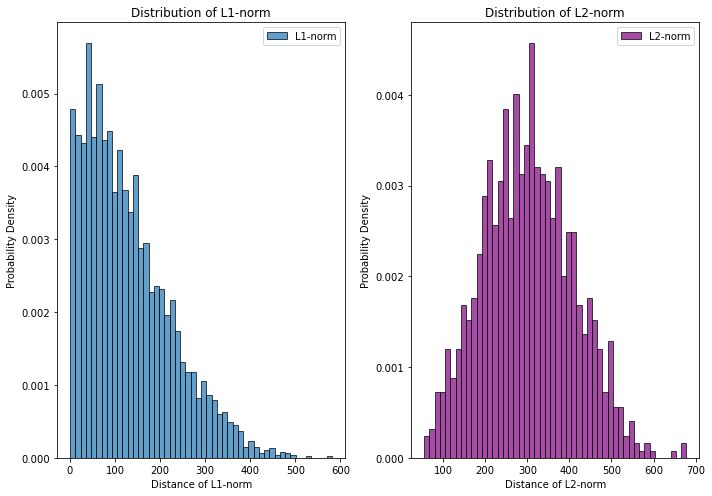

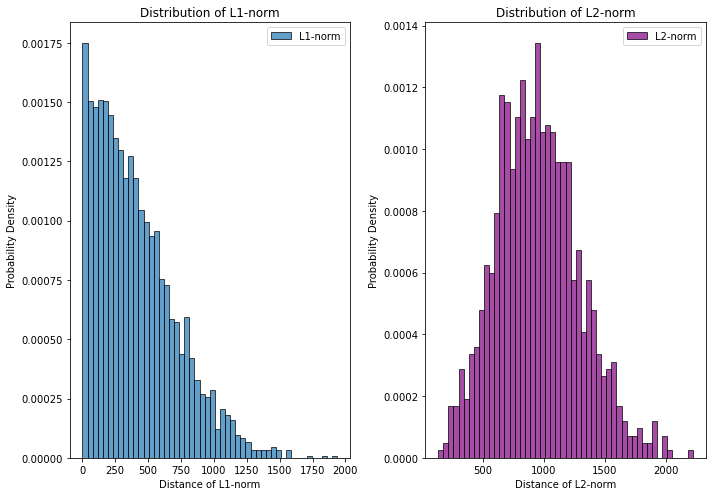

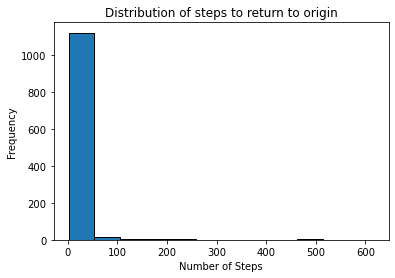

The expectation of time steps required to the origin: 8.782912 

mean: 8.782911944202267
median: 2.0
lower_bound: -1.0
upper_bound: 7.0


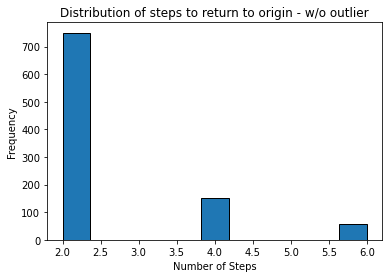

The expectation of time steps required to the origin: 2.554745


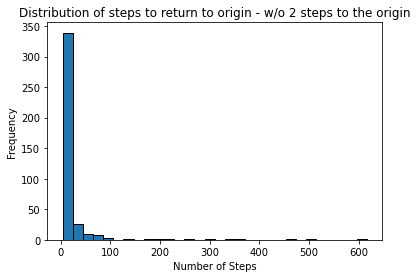

The expectation of time steps required to the origin: 21.596977


In [62]:
def random_walk4():
    steps = [int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]
    start_time = time.time()
    sections = [0 for _ in range(17)]
    final_pos = {key:[] for key in steps}
    to_origin = []

    for round in tqdm(range(1000), desc="Round"):
        for step in steps:
            pos = [0, 0, 0, 0]
            steps_taken = 0
            for s in range(step):
                direction = random.choice([(1,0,0,0), (-1,0,0,0), (0,1,0,0), (0,-1,0,0), (0,0,1,0), (0,0,-1,0), (0,0,0,1), (0,0,0,-1)])
                pos = [pos[i]+direction[i] for i in range(4)]
                steps_taken += 1

                # specify sections
                if pos[0] > 0:
                    if pos[1] > 0:
                        if pos[2] > 0:
                            if pos[3] > 0:
                                sections[1] += 1  # section 1 e.g. (1,1,1,1)
                            elif pos[3] < 0:
                                sections[2] += 1  # section 2 e.g. (1,1,1,-1)
                        elif pos[2] < 0:
                            if pos[3] > 0:
                                sections[3] += 1  # section 3 e.g. (1,1,-1,1)
                            elif pos[3] < 0:
                                sections[4] += 1  # section 4 e.g. (1,1,-1,-1)
                    elif pos[1] < 0:
                        if pos[2] > 0:
                            if pos[3] > 0:
                                sections[5] += 1  # section 5 e.g. (1,-1,1,1)
                            elif pos[3] < 0:
                                sections[6] += 1  # section 6 e.g. (1,-1,1,-1)
                        elif pos[2] < 0:
                            if pos[3] > 0:
                                sections[7] += 1  # section 7 e.g. (1,-1,-1,1)
                            elif pos[3] < 0:
                                sections[8] += 1  # section 8 e.g. (1,-1,-1,-1)
                elif pos[0] < 0:
                    if pos[1] > 0:
                        if pos[2] > 0:
                            if pos[3] > 0:
                                sections[9] += 1  # section 9 e.g.(-1,1,1,1)
                            elif pos[3] < 0:
                                sections[10] += 1  # section 10 e.g. (-1,1,1,-1)
                        elif pos[2] < 0:
                            if pos[3] > 0:
                                sections[11] += 1  # section 11 e.g.(-1,1,-1,1)
                            elif pos[3] < 0:
                                sections[12] += 1  # section 12 e.g. (-1,1,-1,-1)
                    elif pos[1] < 0:
                        if pos[2] > 0:
                            if pos[3] > 0:
                                sections[13] += 1  # section 13 e.g.(-1,-1,1,1)
                            elif pos[3] < 0:
                                sections[14] += 1  # section 14 e.g. (-1,-1,1,-1)
                        elif pos[2] < 0:
                            if pos[3] > 0:
                                sections[15] += 1  # section 15 e.g.(-1,-1,-1,1)
                            elif pos[3] < 0:
                                sections[16] += 1  # section 16 e.g. (-1,-1,-1,-1)
                elif pos == [0,0,0,0]:
                    sections[0] += 1
                    to_origin.append(steps_taken)
                    steps_taken = 0

            final_pos[step].append(pos)
    # record origin
    print("The particle comes back to the origin for %d times" % sections[0])
    # print("Time steps:")
    # if to_origin is not []:
    #     for p in to_origin:
    #         print("At %d round, n=%d, step=%s, particle comes back to the origin" % (p[0], p[1], p[2]))

    for s in sections[1:]:
        print("The particle stays at section %d for %d time steps." %(sections.index(s), s))

    for step in steps:
        l1, l2 = norm(final_pos[step])

        plt.figure(figsize=(10, 7))
        # L1-norm
        plt.subplot(1,2,1)
        plt.hist(l1, bins=50, label=f'L1-norm', density=True, edgecolor='black', alpha=0.7)
        plt.title('Distribution of L1-norm')
        plt.xlabel('Distance of L1-norm')
        plt.ylabel('Probability Density')
        plt.legend()

        # L2-norm
        plt.subplot(1,2,2)
        plt.hist(l2, bins=50, label=f'L2-norm', density=True, edgecolor='black', alpha=0.7, color="purple")
        plt.title('Distribution of L2-norm')
        plt.xlabel('Distance of L2-norm')
        plt.ylabel('Probability Density')
        plt.tight_layout()
        plt.legend()
        plt.show()
    
    # plot the distribution of steps to the origin
    plt.hist(to_origin, bins='sturges', edgecolor='black')
    plt.title('Distribution of steps to return to origin')
    plt.xlabel('Number of Steps')
    plt.ylabel('Frequency')
    plt.show()

    expect = calc_expectation(to_origin)
    print("The expectation of time steps required to the origin: %f \n" %expect)


    # --- Some analysis --- #

    # calc mean and median
    mean = np.mean(to_origin)
    median = np.median(to_origin)
    print("mean:", mean)
    print("median:", median)

    # calc Quantile
    q1 = np.percentile(to_origin, 25)
    q3 = np.percentile(to_origin, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    print("lower_bound:", lower_bound)
    print("upper_bound:", upper_bound)

    to_origin2 = [s for s in to_origin if s > lower_bound and s < upper_bound]
    plt.hist(to_origin2, bins='sturges', edgecolor='black')
    plt.title('Distribution of steps to return to origin - w/o outlier')
    plt.xlabel('Number of Steps')
    plt.ylabel('Frequency')
    plt.show()
    print("The expectation of time steps required to the origin: %f" %calc_expectation(to_origin2))
    
    to_origin2 = [s for s in to_origin if s != 2]
    plt.hist(to_origin2, bins=30, edgecolor='black')
    plt.title('Distribution of steps to return to origin - w/o 2 steps to the origin')
    plt.xlabel('Number of Steps')
    plt.ylabel('Frequency')
    plt.show()
    print("The expectation of time steps required to the origin: %f" %calc_expectation(to_origin2))

random_walk4()